<h1 style="color: #492c68;">01 | PREPROCESSING</h1>

<h2 style="color: #327a81;">Libraries</h2>

In [1]:
## Basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Settings

pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Counter for frequency

from collections import Counter

<h2 style="color: #327a81;">Data Standardization</h2>

In [2]:
data = pd.read_csv("netflix_titles.csv")

In [3]:
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df = data.copy() 

<h3 style="color: #60b671;">Dataset shape & types</h3>

In [5]:
df.shape

(8807, 12)

In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

<h3 style="color: #60b671;">Dealing with nulls and duplicates</h3>

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df.fillna("Not Provided", inplace=True)

In [9]:
df.duplicated().sum()

0

<h3 style="color: #60b671;">Dealing with dates</h3>

In [10]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

In [11]:
df["release_year"] = pd.to_datetime(df["release_year"], errors="coerce")

In [12]:
df["release_year"] = df["release_year"].dt.year

In [13]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int32
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [14]:
df.head(6)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Provided,United States,2021-09-25,1970,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Provided,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Provided,2021-09-24,1970,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Provided,Not Provided,Not Provided,2021-09-24,1970,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Provided,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,1970,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Not Provided,2021-09-24,1970,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


<h2 style="color: #327a81;">Unique values</h2>

- There are a few categorical variables. Let's see how many they have and how they are called

In [15]:
net_type = df["type"].value_counts()
net_type

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [16]:
df["country"].value_counts()

country
United States                             2818
India                                      972
Not Provided                               831
United Kingdom                             419
Japan                                      245
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 749, dtype: int64

In [17]:
df["rating"].value_counts()

rating
TV-MA           3207
TV-14           2160
TV-PG            863
R                799
PG-13            490
TV-Y7            334
TV-Y             307
PG               287
TV-G             220
NR                80
G                 41
TV-Y7-FV           6
Not Provided       4
NC-17              3
UR                 3
74 min             1
84 min             1
66 min             1
Name: count, dtype: int64

In [18]:
df["listed_in"].value_counts()

listed_in
Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: count, Length: 514, dtype: int64

In [19]:
df["duration"].value_counts()

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: count, Length: 221, dtype: int64

In [20]:
df["release_year"].value_counts()

release_year
1970    8807
Name: count, dtype: int64

In [21]:
# "release year" has wrong values, says that every title was released at 1970 and that's not true. Let's drop this variable

df.drop(columns=["release_year"], inplace=True)

<h2 style="color: #327a81;">Features Preprocessing</h2>

<h3 style="color: #60b671;">"listed_in" case: total number of categories and frequency production </h3>

- At "listed_in" happens that one title can have more than one categorie, so it would be nice if we can obtain the real count per categorie

In [22]:
categories = df["listed_in"].str.split(",  ")

In [23]:
categories

0                                         [Documentaries]
1       [International TV Shows, TV Dramas, TV Mysteries]
2       [Crime TV Shows, International TV Shows, TV Ac...
3                                [Docuseries, Reality TV]
4       [International TV Shows, Romantic TV Shows, TV...
                              ...                        
8802                     [Cult Movies, Dramas, Thrillers]
8803             [Kids' TV, Korean TV Shows, TV Comedies]
8804                            [Comedies, Horror Movies]
8805                 [Children & Family Movies, Comedies]
8806     [Dramas, International Movies, Music & Musicals]
Name: listed_in, Length: 8807, dtype: object

In [24]:
# Iterate over categories instance to fill a new list with all the elements

all_cat = []

for cat_list in categories:
    for string in cat_list:
        all_cat.extend(string.split(", "))

In [25]:
# Let's find the categories frequency

all_cat_count = Counter(all_cat)

In [26]:
df_all_cat = pd.DataFrame(list(all_cat_count.items()), columns=["category","count"])

In [27]:
df_all_cat = df_all_cat.sort_values(by="count", ascending=False)

In [28]:
df_all_cat.head(10)

,category,count
14,International Movies,2752
12,Dramas,2427
16,Comedies,1674
1,International TV Shows,1351
0,Documentaries,869
25,Action & Adventure,859
2,TV Dramas,763
13,Independent Movies,756
11,Children & Family Movies,641
19,Romantic Movies,616


In [29]:
# From these categories, we will also obtain a set with the names. We will use it later

all_cat_set = set(all_cat)
print(f"There are a total of {len(all_cat_set)} categories through the catalog.")

There are a total of 42 categories through the catalog.


<h3 style="color: #60b671;">"director" case: total number of directors and their production</h3>

- This case is similar to "listed_in" variable. We need to list all directors separately to know their frequency and for the recommender features

In [30]:
director = df["director"]

In [31]:
# We operate as we did it in the previous case

all_directors = []

for dir_list in director:
        directors = dir_list.split(", ")
        all_directors.extend(directors)

In [32]:
# Frequency counts

all_directors_count = Counter(all_directors)

In [33]:
df_all_dir = pd.DataFrame(list(all_directors_count.items()), columns=["director","count"])

In [34]:
df_all_dir = df_all_dir.sort_values(by="count", ascending=False)

In [35]:
df_all_dir.head(10)

,director,count
1,Not Provided,2634
282,Rajiv Chilaka,22
2692,Jan Suter,21
2691,Raúl Campos,19
618,Suhas Kadav,16
1588,Marcus Raboy,16
1685,Jay Karas,15
986,Cathy Garcia-Molina,13
894,Martin Scorsese,12
2177,Jay Chapman,12


In [36]:
# Lets get a set with all directors to future features

all_dir_set = set(all_directors)
print(f"There are a total of {len(all_dir_set)} directors in the catalog")

There are a total of 4994 directors in the catalog


<h3 style="color: #60b671;">"country" case: total number of countries and production </h3>

- As in the cases of "director" and "listed_in", we need to treat this variable to know the total of countries and their frequency production

In [37]:
countries = df["country"]

In [38]:
countries

0       United States
1        South Africa
2        Not Provided
3        Not Provided
4               India
            ...      
8802    United States
8803     Not Provided
8804    United States
8805    United States
8806            India
Name: country, Length: 8807, dtype: object

In [39]:
all_countries = []

for country_list in countries:
    country = country_list.split(", ")
    all_countries.extend(country)

In [40]:
#Frequency counts

all_countries_count = Counter(all_countries)

In [41]:
df_all_countr = pd.DataFrame(list(all_countries_count.items()), columns=["country","count"])

In [42]:
df_all_countr = df_all_countr.sort_values(by="count", ascending=False)

In [43]:
df_all_countr.head(10)

,country,count
0,United States,3689
3,India,1046
2,Not Provided,831
6,United Kingdom,804
16,Canada,445
13,France,393
17,Japan,318
19,Spain,232
21,South Korea,231
7,Germany,226


In [44]:
# As we did it before, we save a set with the countries for future features

all_countr_set = set(all_countries)
print(f"There are a total of {len(all_countr_set)} countries with available titles in the catalogue.")

There are a total of 128 countries with available titles in the catalogue.


<h3 style="color: #60b671;">"cast" case: obtaining the total actors list and frequency </h3>

In [45]:
cast = df["cast"]

In [46]:
all_cast = []

for cast_list in cast:
    actor = cast_list.split(", ")
    all_cast.extend(actor)

In [47]:
# Frequency count

all_cast_count = Counter(all_cast)

In [48]:
df_cast_count = pd.DataFrame(list(all_cast_count.items()), columns=["cast","count"])

In [49]:
df_cast_count = df_cast_count.sort_values(by="count", ascending=False)

In [50]:
df_cast_count.head(10)

,cast,count
0,Not Provided,825
1434,Anupam Kher,43
783,Shah Rukh Khan,35
304,Julie Tejwani,33
1635,Naseeruddin Shah,32
4943,Takahiro Sakurai,32
305,Rupa Bhimani,31
1559,Akshay Kumar,30
11644,Om Puri,30
4469,Yuki Kaji,29


In [51]:
# Save a set with all name cast for further features

all_cast_set = set(all_cast)

<h3 style="color: #60b671;">"duration" case: from categorical to numerical values </h3>

- It would be better if we treat this variable as numerical for further explorations. But for that, we need to split the values that are lenght minutes from the values named seasons

In [52]:
df_shows = df[df["type"] == "TV Show"]

In [53]:
df_shows["duration"].unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [54]:
df_movies = df[df["type"] == "Movie"]

In [55]:
df_movies["duration"].unique()

array(['90 min', '91 min', '125 min', '104 min', '127 min', '67 min',
       '94 min', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '110 min', '105 min', '96 min',
       '124 min', '116 min', '98 min', '23 min', '115 min', '122 min',
       '99 min', '88 min', '100 min', '102 min', '93 min', '95 min',
       '85 min', '83 min', '113 min', '13 min', '182 min', '48 min',
       '145 min', '87 min', '92 min', '80 min', '117 min', '128 min',
       '119 min', '143 min', '114 min', '118 min', '108 min', '63 min',
       '121 min', '142 min', '154 min', '120 min', '82 min', '109 min',
       '101 min', '86 min', '229 min', '76 min', '89 min', '156 min',
       '112 min', '107 min', '129 min', '135 min', '136 min', '165 min',
       '150 min', '133 min', '70 min', '84 min', '140 min', '78 min',
       '64 min', '59 min', '139 min', '69 min', '148 min', '189 min',
       '141 min', '130 min', '138 min', '81 min', '132 min', '123 min',
       '65

In [56]:
# We can see that shows are categorized by season and movies by lenght. So let's split them into two new variables, numerical both, for a better EDA

season_array = []

for i in df["duration"]:
    num, type_ = i.split()
    if type_ == "Season" or type_ == "Seasons":
        season_array.append(num)
    else:
        season_array.append("Not a Show")

In [57]:
df.columns.get_loc("duration")

8

In [58]:
df.insert(loc=10, column="n_seasons", value=season_array)

In [59]:
lenght_array = []

for i in df["duration"]:
    num, type_ = i.split()
    if type_ == "min":
        lenght_array.append(num)
    else:
        lenght_array.append("Not a Movie")

In [60]:
df.insert(loc=11, column="movie_lenght", value=lenght_array)

In [61]:
df.sample(1)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,n_seasons,movie_lenght,description
1011,s1012,Movie,Free to Play,Not Provided,Not Provided,United States,2021-04-19,TV-14,76 min,Documentaries,Not a Show,76,This documentary follows three professional vi...


In [62]:
# Now, we transform "n_season" and "movie_lenght" to numeric values

df["n_seasons"] = pd.to_numeric(df["n_seasons"], errors="coerce")
df["movie_lenght"] = pd.to_numeric(df["movie_lenght"], errors="coerce")

In [63]:
#Let's drop out the variable "duration", now is kind of useless

df.drop(columns="duration", inplace=True)

In [64]:
df.sample(1)

,show_id,type,title,director,cast,country,date_added,rating,listed_in,n_seasons,movie_lenght,description
6278,s6279,Movie,Being AP,Anthony Wonke,Tony McCoy,United Kingdom,2016-08-15,TV-14,"Documentaries, International Movies, Sports Mo...",NaN,99.0,"With retirement staring him in the face, an al..."


<h1 style="color: #492c68;">02 | EDA</h1>

<h2 style="color: #327a81;">Movies & TV Shows</h2>

<h3 style="color: #60b671;">How many movies and shows are in catalogue</h3>

In [65]:
net_type = net_type.reset_index()
net_type

,type,count
0,Movie,6131
1,TV Show,2676


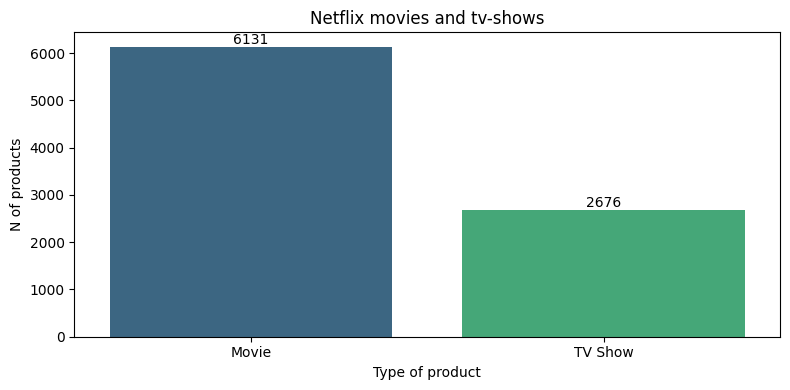

In [66]:
# Lets see the comparision between the two types on a barplot

plt.figure(figsize=(8,4))
sns.barplot(data=net_type, x="type", y="count", palette="viridis")
plt.title("Netflix movies and tv-shows")
plt.xlabel("Type of product")
plt.ylabel("N of products")

for index, value in enumerate(net_type["count"]):
    plt.text(index, value, str(round(value,2)), va="bottom", ha="center", fontsize=10)
    
plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Movies & Tv Shows| Countries production</h3>

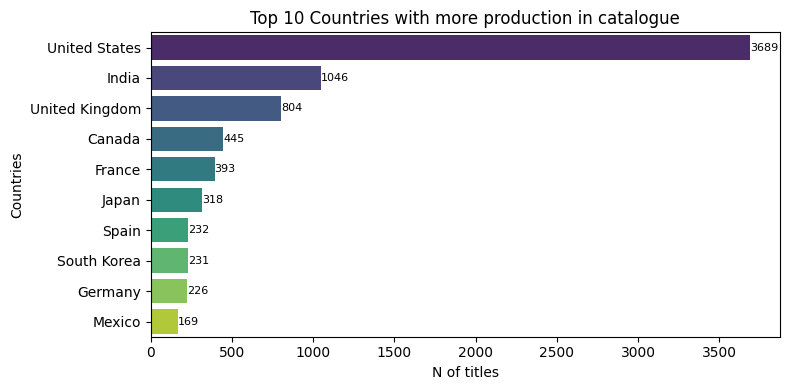

In [67]:
#Let's check the top 10 countries with more productions in catalogue
#We use the df saved before "df_all_countr"

top10_countries = df_all_countr[df_all_countr["country"] != "Not Provided"].head(10)

plt.figure(figsize=(8,4))
sns.barplot(data=top10_countries, x="count", y="country", palette="viridis")
plt.title("Top 10 Countries with more production in catalogue")
plt.xlabel("N of titles")
plt.ylabel("Countries")

for index, value in enumerate(top10_countries["count"]):
    plt.text(value, index, str(value), va="center", ha="left", fontsize=8)
    
plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Movies & Tv Shows| Frequent productions categories by country</h3>

In [68]:
# Each productionÇ could have more than categorie, so let's stack in a df all categories one by one

title_countr_cat = df[["title","country","listed_in"]]
title_countr_cat = title_countr_cat.drop(columns="listed_in").join(df["listed_in"].str.split(", ", expand=True).stack().reset_index(level=1, drop=True).rename("category"))

In [69]:
title_countr_cat.head(5)

,title,country,category
0,Dick Johnson Is Dead,United States,Documentaries
1,Blood & Water,South Africa,International TV Shows
1,Blood & Water,South Africa,TV Dramas
1,Blood & Water,South Africa,TV Mysteries
2,Ganglands,Not Provided,Crime TV Shows


In [70]:
# Now we can check how many categories are per country

countr_cat = title_countr_cat.groupby(["country","category"]).size().reset_index(name="counts")
countr_cat = countr_cat.sort_values(by="counts", ascending=False).reset_index(drop=True)

In [71]:
#So now we have a df with all category counts per country

countr_cat.head(5)

,country,category,counts
0,India,International Movies,817
1,India,Dramas,620
2,United States,Dramas,591
3,United States,Comedies,524
4,United States,Documentaries,411


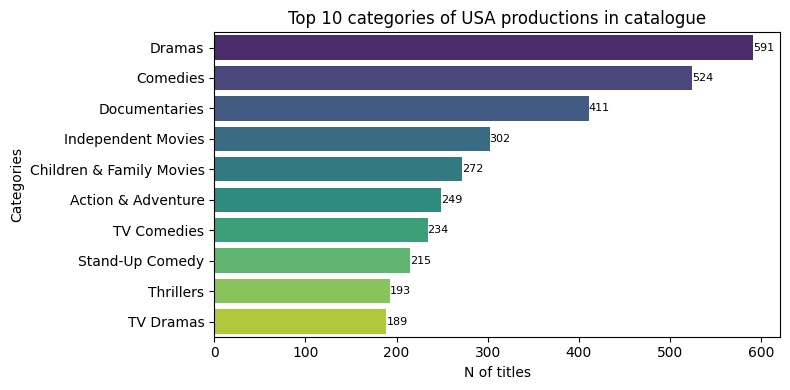

In [72]:
# And we can show, for example, the top 10 categories by USA, the country with more productions in catalogue
# 

usa_top_cat = countr_cat[countr_cat["country"] == "United States"].head(10).reset_index(drop=True)

plt.figure(figsize=(8,4))
sns.barplot(data=usa_top_cat, x="counts", y="category", palette="viridis")
plt.title("Top 10 categories of USA productions in catalogue")
plt.xlabel("N of titles")
plt.ylabel("Categories")

for index, value in enumerate(usa_top_cat["counts"]):
    plt.text(value, index, str(value), va="center", ha="left", fontsize=8)
    
plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Movies | Lenght duration distribution</h3>

In [73]:
# Check a describe on the column to see the general information about it 

df["movie_lenght"].describe().round(2)

count    6128.00
mean       99.58
std        28.29
min         3.00
25%        87.00
50%        98.00
75%       114.00
max       312.00
Name: movie_lenght, dtype: float64

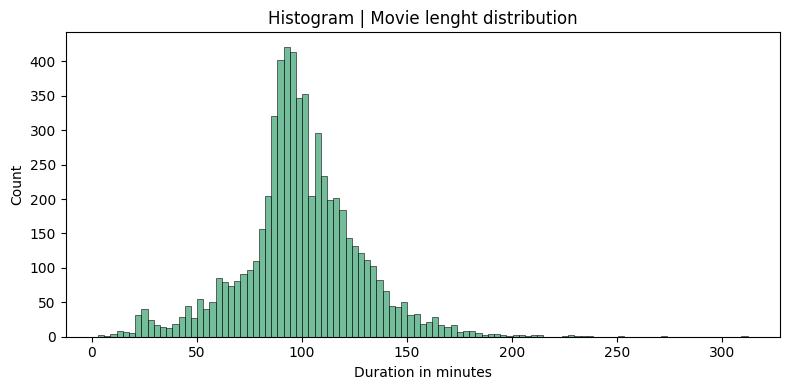

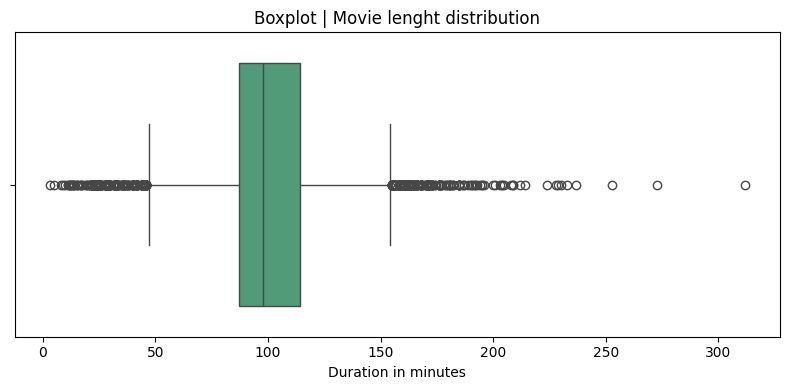

In [74]:
# Check the movie lenght distribution

plt.figure(figsize=(8,4))
sns.histplot(data=df["movie_lenght"], color="#45a778")
plt.title("Histogram | Movie lenght distribution")
plt.xlabel("Duration in minutes")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df["movie_lenght"], color="#45a778")
plt.title("Boxplot | Movie lenght distribution")
plt.xlabel("Duration in minutes")

plt.tight_layout()
plt.show()

- We observed that the duration of the films maintains a normal distribution, as far as possible. Although we can appreciate some right-skewness that indicates that there are some outliers.
- Just for curiosity, let's identify these outliers.
- Using IQR is going to give us to much titles, so let's get over 200 (at the boxplot we can see that those outliers are the more prominent)

In [75]:
df_max_lenghts = df[df["movie_lenght"] >= 200]
print(f"There are {len(df_max_lenghts)} titles with more than 200 min lenght duration")

There are 20 titles with more than 200 min lenght duration


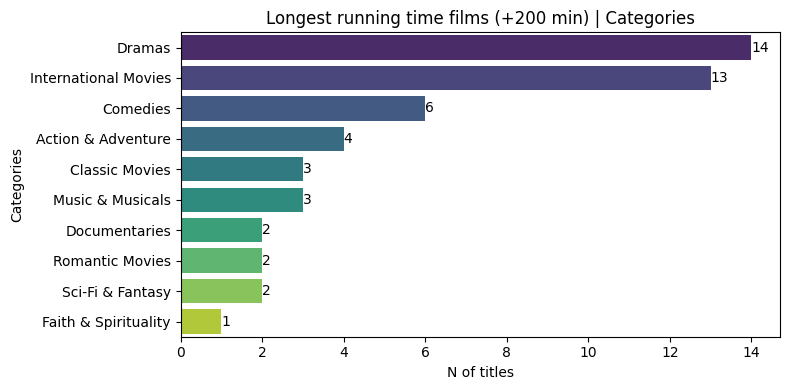

In [76]:
#Ranked categories films with longest running time

max_len_cat = []

for cat in df_max_lenghts["listed_in"]:
    categorie = cat.split(", ")
    max_len_cat.extend(categorie)
    
max_len_cat = Counter(max_len_cat)
max_len_cat = pd.DataFrame(list(max_len_cat.items()), columns=["category", "count"])
max_len_cat = max_len_cat.sort_values(by="count", ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=max_len_cat, x="count", y="category", palette="viridis")
plt.title("Longest running time films (+200 min) | Categories")
plt.xlabel("N of titles")
plt.ylabel("Categories")

for index, value in enumerate(max_len_cat["count"]):
    plt.text(value, index, str(value), va="center", ha="left", fontsize=10)
    
plt.tight_layout()
plt.show()

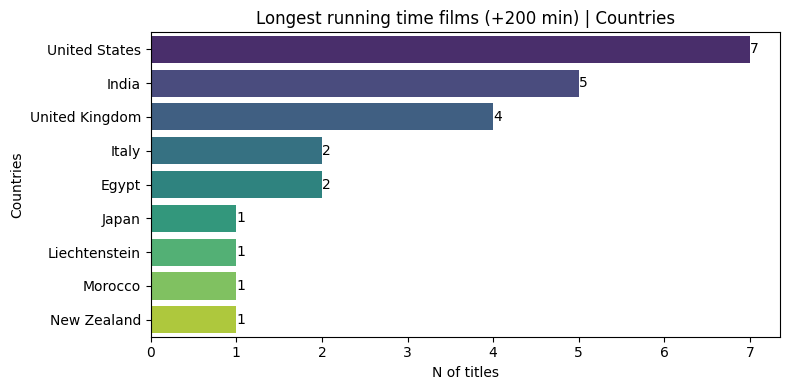

In [77]:
#Ranked countries films with longest running time

max_len_countr = []

for countr in df_max_lenghts["country"]:
    country = countr.split(", ")
    max_len_countr.extend(country)
    
max_len_countr = Counter(max_len_countr)
max_len_countr = pd.DataFrame(list(max_len_countr.items()), columns=["country", "count"])
max_len_countr = max_len_countr.sort_values(by="count", ascending=False)

max_len_countr = max_len_countr[max_len_countr["country"] != "Not Provided"]

plt.figure(figsize=(8,4))
sns.barplot(data=max_len_countr, x="count", y="country", palette="viridis")
plt.title("Longest running time films (+200 min) | Countries")
plt.xlabel("N of titles")
plt.ylabel("Countries")

for index, value in enumerate(max_len_countr["count"]):
    plt.text(value, index, str(value), va="center", ha="left", fontsize=10)
    
plt.tight_layout()
plt.show()

<h3 style="color: #60b671;">Tv Shows | N Seasons distribution</h3>

In [78]:
df["n_seasons"].describe().round(2)

count    2676.00
mean        1.76
std         1.58
min         1.00
25%         1.00
50%         1.00
75%         2.00
max        17.00
Name: n_seasons, dtype: float64

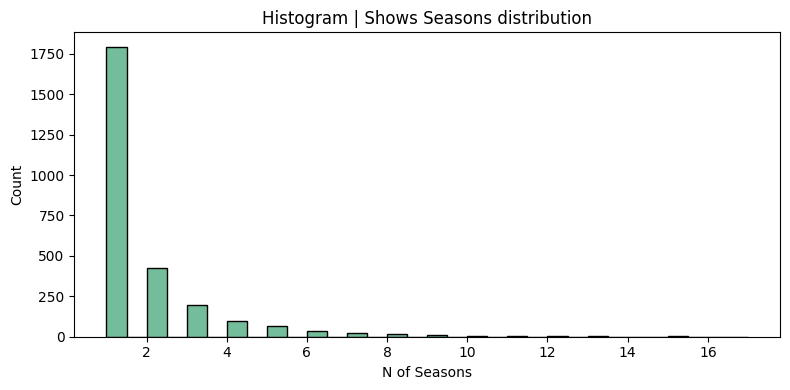

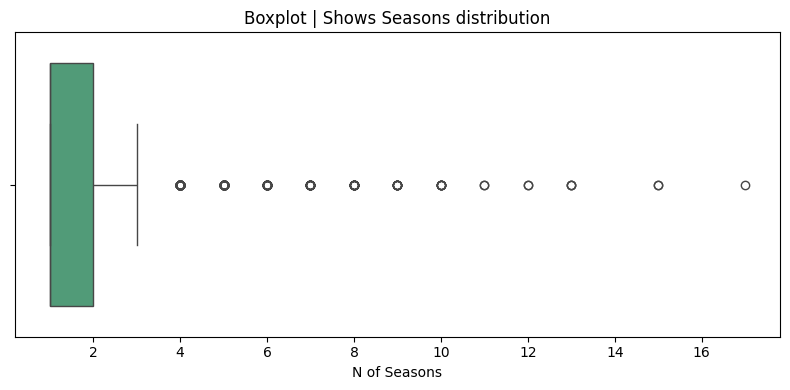

In [79]:
# Check the movie lenght distribution

plt.figure(figsize=(8,4))
sns.histplot(data=df["n_seasons"], color="#45a778", bins=32)
plt.title("Histogram | Shows Seasons distribution")
plt.xlabel("N of Seasons")

plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df["n_seasons"], color="#45a778")
plt.title("Boxplot | Shows Seasons distribution")
plt.xlabel("N of Seasons")

plt.tight_layout()
plt.show()

- The distribution (with prominent right skewness) tell us that the average seasons for tv shows are between 2-1. The average seasons per show is 1.76. The majority of titles have only 1 or 2 seasons, but the right deviation show us that there are few titles with more seasons.
- Let's identificate the shows with more seasons (this time we will use IQR)

In [80]:
# Let's see the outliers in this case. We will obtain the atypical tv shows with more seasons.
# IQR will help us to do this, check in the values over the superior limit.

Q1_tv = df["n_seasons"].quantile(0.25)
Q3_tv = df["n_seasons"].quantile(0.75)
IQR_tv = Q3_tv - Q1_tv

tv_upper_limit = Q3_tv + 1.5 * IQR_tv

tv_outliers = df["n_seasons"] > tv_upper_limit
print(f"We have a total of {len(df[tv_outliers])} of {len(df)} titles that are atypically high. {round((len(df[tv_outliers]) / len(df)) * 100,2)}% of the total entries.")

We have a total of 259 of 8807 titles that are atypically high. 2.94% of the total entries.


<h1 style="color: #492c68;">03 | EXPORT DATASET FOR MOOD ANALYSIS</h1>

In [81]:
# Finally we export a new csv with the treated dataset to do the mood analysis for the recommender

df.to_csv("Netflx_mood_analysis.csv", index=False)

In [82]:
df

,show_id,type,title,director,cast,country,date_added,rating,listed_in,n_seasons,movie_lenght,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Provided,United States,2021-09-25,PG-13,Documentaries,NaN,90.0,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Provided,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",2.0,NaN,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Provided,2021-09-24,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",1.0,NaN,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Provided,Not Provided,Not Provided,2021-09-24,TV-MA,"Docuseries, Reality TV",1.0,NaN,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Provided,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",2.0,NaN,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,R,"Cult Movies, Dramas, Thrillers",NaN,158.0,"A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Not Provided,Not Provided,Not Provided,2019-07-01,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies",2.0,NaN,"While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,R,"Comedies, Horror Movies",NaN,88.0,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,PG,"Children & Family Movies, Comedies",NaN,88.0,"Dragged from civilian life, a former superhero..."
